In [2]:
from grenmlin import simulator, grn
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import visualize, get_input_signals, test_inputs

## 2:1 MUX
2 genes with 3 input species and 1 output species.

In [17]:
my_grn = grn.grn()

In [18]:
# input species
my_grn.add_input_species("X1")
my_grn.add_input_species("X2")
my_grn.add_input_species("S0")

# other species
my_grn.add_species("MUX", 0.1)

In [19]:
# X1 AND NOT S0
regulators = [{'name': 'X1', 'type': 1, 'Kd': 5, 'n': 2},
                {'name': 'S0', 'type': -1, 'Kd': 5, 'n': 3}]
products = [{'name': 'MUX'}]

# adding a gene to the network - the first parameter specifies the rate of gene expression
my_grn.add_gene(10, regulators, products)

In [20]:
# X2 AND S0
regulators = [{'name': 'X2', 'type': 1, 'Kd': 5, 'n': 2},
                {'name': 'S0', 'type': 1, 'Kd': 5, 'n': 3}]
products = [{'name': 'MUX'}]

# adding a gene to the network - the first parameter specifies the rate of gene expression
my_grn.add_gene(10, regulators, products)

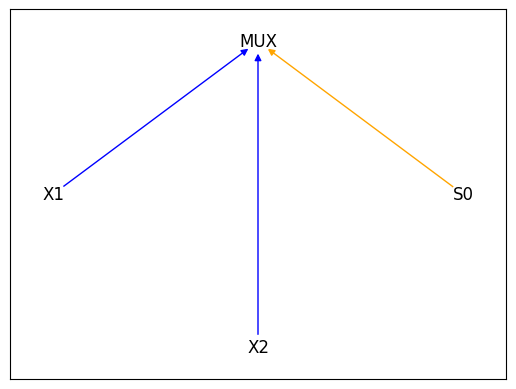

In [21]:
my_grn.plot_network()

In [22]:
inputs = get_input_signals(3, 100)
T, Y = simulator.simulate_sequence(my_grn, inputs, t_single = 250, plot_on=False)

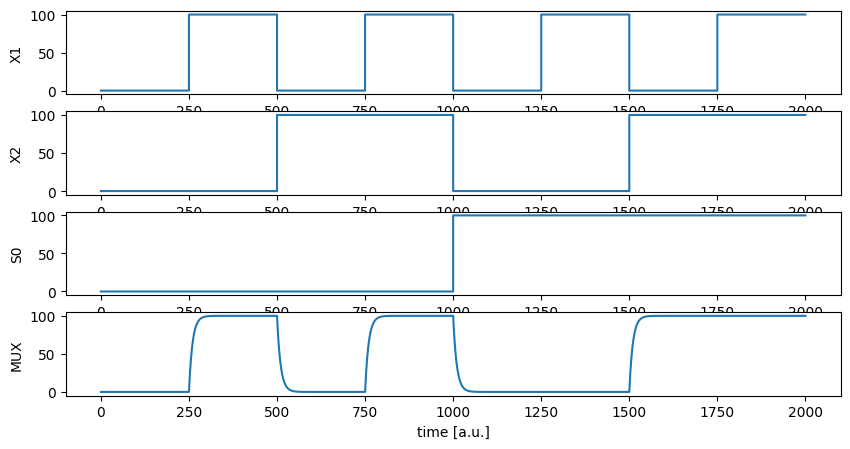

In [23]:
visualize(T, Y, my_grn)

## 4:1 MUX with 3x 2:1 MUXs

In [10]:
n = 6
amp = 100
x = 250

inputs = np.array(get_input_signals(n, amp))
#test_inputs(inputs, x)

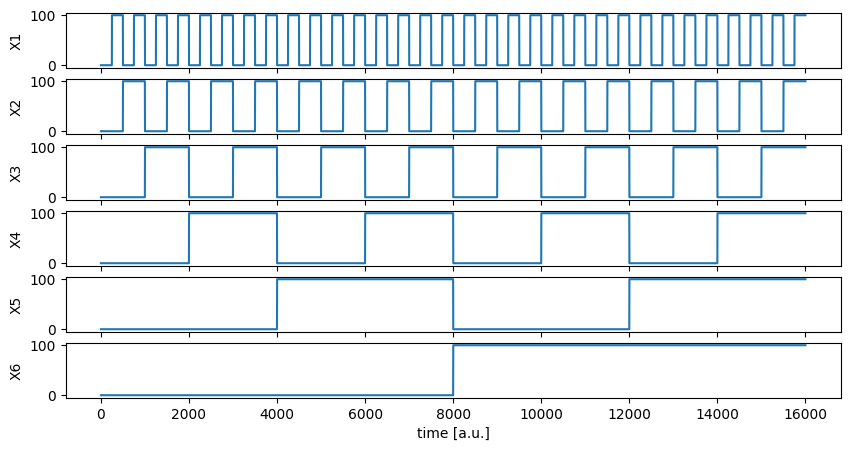

In [11]:
test_inputs(inputs, x=250)

In [12]:
T1, MUX1 = simulator.simulate_sequence(my_grn, inputs[:, [0, 1, 4]], t_single = 250, plot_on=False)
T2, MUX2 = simulator.simulate_sequence(my_grn, inputs[:, [2, 3, 4]], t_single = 250, plot_on=False)

In [13]:
S2 = []
for sig in inputs[:, -1]:
    for i in range(x+1):
        S2.append(sig)
S2 = np.array(S2)
inputs2 = np.array([MUX1[:,-1], MUX2[:, -1], S2]).transpose()

In [14]:
T3, MUX3 = simulator.simulate_sequence(my_grn, inputs2, t_single = 1, plot_on=False)
MUX3_fix = np.array([e for i, e in enumerate(MUX3) if i%2==0])

In [15]:
Y = np.array([MUX1[:, 0], MUX1[:, 1], MUX2[:, 0], MUX2[:, 1], MUX2[:, 2], MUX3_fix[:, 2], MUX1[:, 3], MUX2[:, 3], MUX3_fix[:, -1]]).T
Y.shape

(16064, 9)

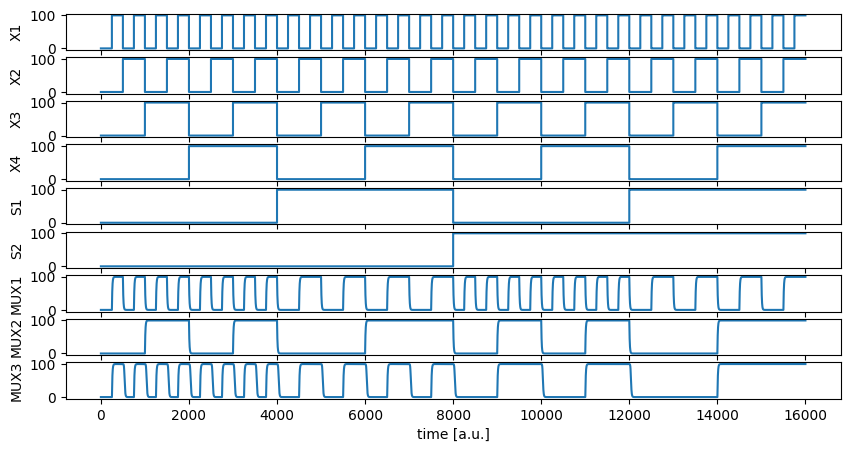

In [16]:
names = ["X1", "X2", "X3", "X4", "S1", "S2", "MUX1", "MUX2", "MUX3"]
visualize(T1, Y, names=names)